# Into to Configuring Initialization of model weights

### Why you should not configure the weights yourself (especially with values that make the gradient of the sigmoid almost 0)

In [1]:
import torch
from torch import nn, optim
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
torch.manual_seed(0)

In [17]:
def plot_data(x, y, model, epoch):
    plt.plot(x.numpy(), model(x).detach().numpy(), label='Epoch ' + str(epoch))
    plt.plot(x.numpy(), y.numpy(), 'r', label='True function')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()

In [3]:
class Net(nn.Module):
    def __init__(self, dim_in, dim_H, dim_out):
        super(Net, self).__init__()
        self.Seq1 = nn.Sequential(nn.Linear(dim_in, dim_H), nn.Sigmoid())
        self.Seq2 = nn.Sequential(nn.Linear(dim_H, dim_out), nn.Sigmoid())
        
    def forward(self, x):
        x = self.Seq1(x)
        x = self.Seq2(x)
        return x

In [4]:
def train_model(model, ds, optimizer, criterion, epochs):
    epoch_cost_list = []
    for epoch in range(epochs):
        epoch_loss = 0
        for x, y in ds: # Single batch (Regular SGD)
            y_hat = model(x)
            loss = criterion(y_hat, y)
            epoch_loss += loss.item()
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        epoch_cost_list.append(epoch_loss)
        
        if epoch % 300 == 0: 
            plot_data(ds.x, ds.y, model, epoch)
            plt.show()
    return epoch_cost_list

In [24]:
from torch.utils.data import Dataset

class Data(Dataset):
    def __init__(self):
        self.x = torch.arange(-20, 20, 1).view(-1, 1).type(torch.FloatTensor)
        self.y = torch.zeros(self.x.shape[0])
        self.y[(self.x[:, 0] > -4) & (self.x[:, 0] < 4)] = 1.0
        self.len = self.x.shape[0]
    
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return self.len

In [25]:
ds = Data()
criterion = nn.BCELoss()
model = Net(1, 2, 1)
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [26]:
# Model initialization
model.state_dict()['Seq1.0.weight'][0] = 1.0
model.state_dict()['Seq1.0.weight'][1]=1.0
model.state_dict()['Seq1.0.bias'][0]=0.0
model.state_dict()['Seq1.0.bias'][1]=0.0
model.state_dict()['Seq2.0.weight'][0]=1.0
model.state_dict()['Seq2.0.bias'][0]=0.0
model.state_dict()

OrderedDict([('Seq1.0.weight',
              tensor([[1.],
                      [1.]])),
             ('Seq1.0.bias', tensor([0., 0.])),
             ('Seq2.0.weight', tensor([[1., 1.]])),
             ('Seq2.0.bias', tensor([0.]))])

In [27]:
# Randomly initialized
model2 = Net(1, 2, 1)
optimizer2 = optim.SGD(model2.parameters(), lr=0.1)
model2.state_dict()

OrderedDict([('Seq1.0.weight',
              tensor([[0.3021],
                      [0.5490]])),
             ('Seq1.0.bias', tensor([-0.1262,  0.0382])),
             ('Seq2.0.weight', tensor([[0.1638, 0.4387]])),
             ('Seq2.0.bias', tensor([0.6790]))])

Model with Initialized weights


C:\Users\msctb\Downloads\New folder\lib\site-packages\torch\nn\modules\loss.py:529: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


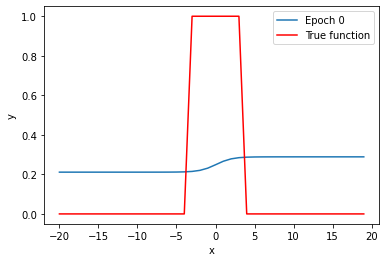

C:\Users\msctb\Downloads\New folder\lib\site-packages\torch\nn\modules\loss.py:529: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


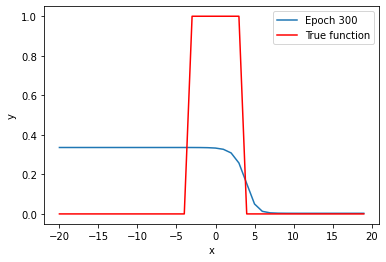

C:\Users\msctb\Downloads\New folder\lib\site-packages\torch\nn\modules\loss.py:529: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


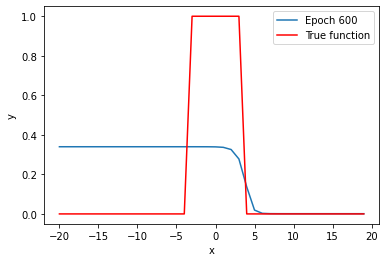

C:\Users\msctb\Downloads\New folder\lib\site-packages\torch\nn\modules\loss.py:529: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


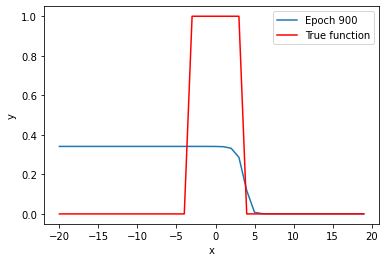

C:\Users\msctb\Downloads\New folder\lib\site-packages\torch\nn\modules\loss.py:529: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


Model without Initialized weights


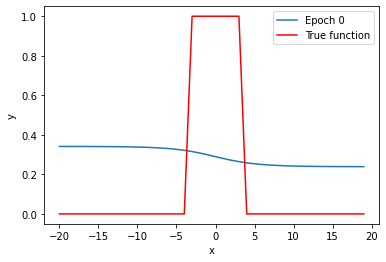

C:\Users\msctb\Downloads\New folder\lib\site-packages\torch\nn\modules\loss.py:529: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


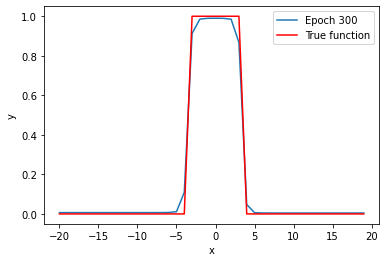

C:\Users\msctb\Downloads\New folder\lib\site-packages\torch\nn\modules\loss.py:529: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


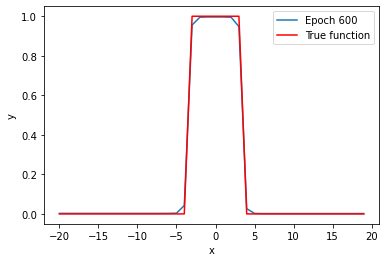

C:\Users\msctb\Downloads\New folder\lib\site-packages\torch\nn\modules\loss.py:529: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


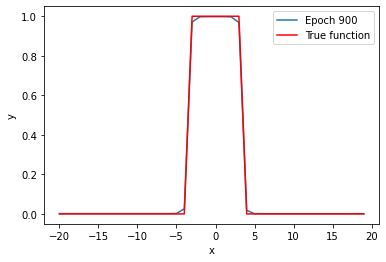

C:\Users\msctb\Downloads\New folder\lib\site-packages\torch\nn\modules\loss.py:529: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


In [28]:
# 2nd model does much better in this case
print('Model with Initialized weights')
cost_model = train_model(model, ds, optimizer, criterion, 1000)
print('Model without Initialized weights')
cost_model2 = train_model(model2, ds, optimizer2, criterion, 1000)

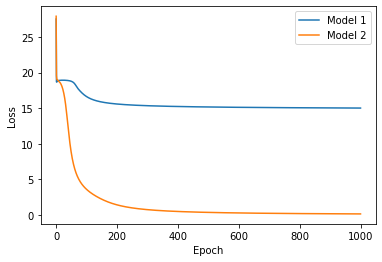

In [29]:
plt.plot(cost_model, label='Model 1')
plt.plot(cost_model2, label='Model 2')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()